In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#given a tree and pickled model, predict top N probabilities and classes
from functions import *

#test data


sql = '''
SELECT signature, count(*) as total_functions
FROM `contract-explorer-233919.ethparis.functions11`
GROUP BY signature
'''

df1 = client.query(sql, location='europe-west2').to_dataframe()


In [61]:
df1 = df1.sort_values(by='total_functions', ascending=False)

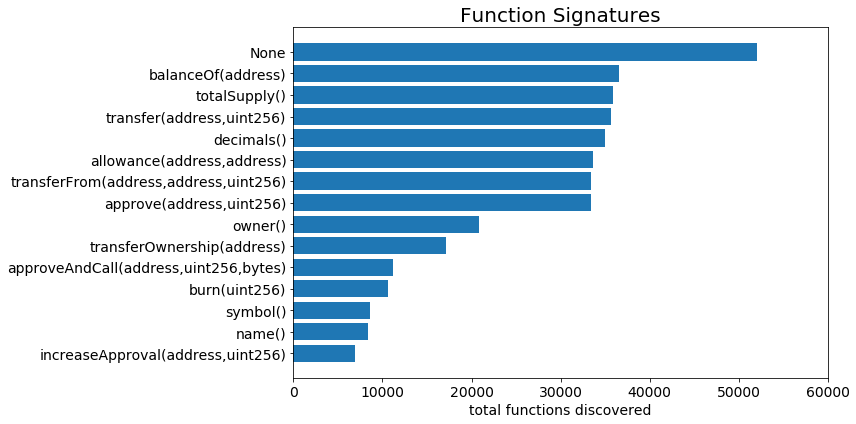

In [107]:
n=15

x_pos = np.arange(n)
totals = df1.total_functions.values[:n]

cols = df1.signature.values[:n]
bar_width = .8

#how many features to plot?

x_pos = x_pos[:n][::-1]
totals = totals[:n]

#plot
plt.figure(figsize=(12,6))
plt.barh(x_pos, totals, bar_width, label='none')
plt.yticks(x_pos, cols, rotation=0, fontsize=14)
# plt.xscale('log')
plt.xticks(fontsize=14)
plt.xlim(0,60000)
plt.xlabel('total functions discovered', fontsize=14)
plt.title('Function Signatures', fontsize=20)
plt.tight_layout()

In [207]:
#given a tree and pickled model, predict top N probabilities and classes
from functions import *

#test data


sql = '''
SELECT signature, tree_hash, count(*) as total_functions
FROM `contract-explorer-233919.ethparis.functions11`
GROUP BY signature, tree_hash
ORDER BY total_functions desc
'''

df = client.query(sql, location='europe-west2').to_dataframe()


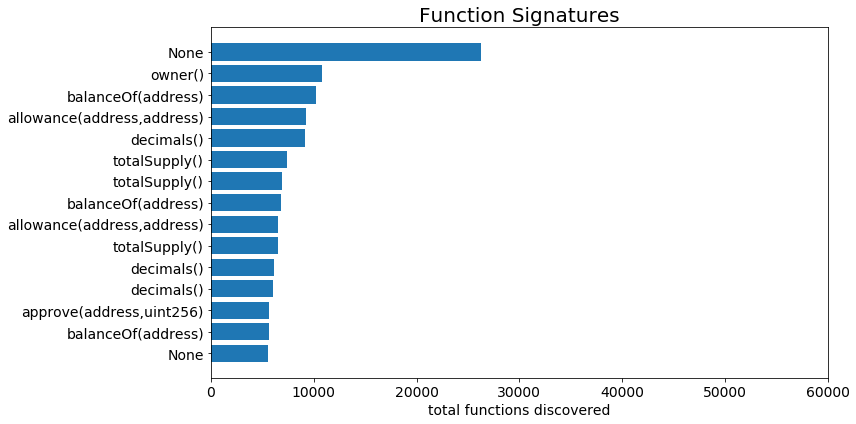

In [208]:
x_pos2 = np.arange(n)
totals2 = df.total_functions.values[:n]

cols2 = df.signature.values[:n]
bar_width = .8

#how many features to plot?

x_pos2 = x_pos2[:n][::-1]
totals2 = totals2[:n]

#plot
plt.figure(figsize=(12,6))
plt.barh(x_pos2, totals2, bar_width, label='none')
plt.yticks(x_pos2, cols2, rotation=0, fontsize=14)
# plt.xscale('log')
plt.xticks(fontsize=14)
plt.xlim(0,60000)
plt.xlabel('total functions discovered', fontsize=14)
plt.title('Function Signatures', fontsize=20)
plt.tight_layout()

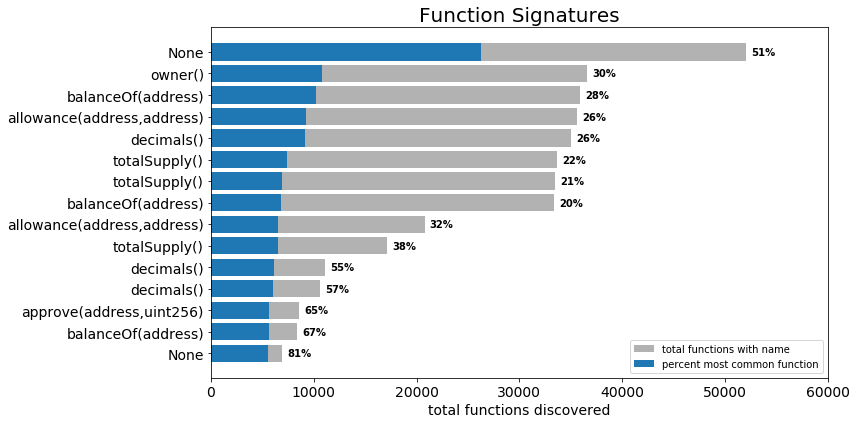

In [222]:
percent = (totals2/totals*100).round(0)[::-1]

plt.figure(figsize=(12,6))
plt.barh(x_pos, totals, bar_width, color='black',label='total functions with name', alpha=.3)
plt.barh(x_pos, totals2, bar_width, label='percent most common function', alpha=1)
plt.yticks(x_pos, cols2, rotation=0, fontsize=14)
# plt.xscale('log')
plt.xticks(fontsize=14)
plt.xlim(0,60000)
plt.xlabel('total functions discovered', fontsize=14)
plt.title('Function Signatures', fontsize=20)
plt.legend()

# for i, v in enumerate(x_pos2):
#     plt.text(1000, i-.15, str(percent[i])[:2]+'%', color='white', fontweight='bold')

for i, v in enumerate(x_pos2):
    plt.text(totals[::-1][i]+500, i-.15, str(percent[i])[:2]+'%', color='black', fontweight='bold')
plt.tight_layout()

In [73]:

sql = '''select
count(distinct signature) as total_sig, count(distinct `hash`) as total_hash
FROM `contract-explorer-233919.ethparis.functions11`
'''

data= client.query(sql, location='europe-west2').to_dataframe()

In [74]:
data

,total_sig,total_hash
0,45958,77680


In [186]:

sql = '''select
signature, count(distinct tree_hash) as total_hash
FROM `contract-explorer-233919.ethparis.functions3`
group by signature
order by 2 desc
'''
df2 = client.query(sql, location='europe-west2').to_dataframe()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


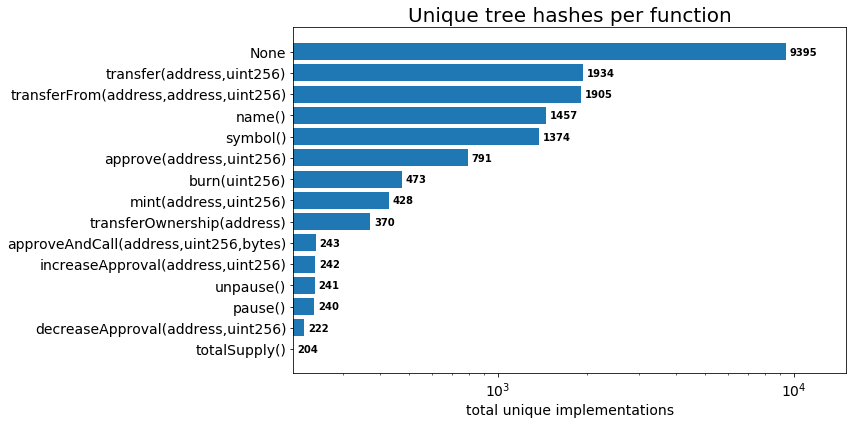

In [206]:
x_pos2 = np.arange(n)
totals2 = df2.total_hash.values[:n]

cols2 = df2.signature.values[:n]
bar_width = .8

#how many features to plot?

x_pos2 = x_pos2[:n][::-1]
totals2 = totals2[:n]

#plot
plt.figure(figsize=(12,6))
plt.barh(x_pos2, totals2, bar_width, label='none')
plt.yticks(x_pos2, cols2, rotation=0, fontsize=14)
plt.xscale('log')
plt.xticks(fontsize=14)
plt.xlim(0,15000)
plt.xlabel('total unique implementations', fontsize=14)
plt.title('Unique tree hashes per function', fontsize=20)

for i, v in enumerate(x_pos2):
    plt.text(totals2[::-1][i]*1.03, i-.15, (totals2[::-1][i]), color='black', fontweight='bold')

plt.tight_layout()